# MIDTERM REVIEW

## Midterm : Wednesday, October 27 during lecture

**Exam Timing and Logistics:** 

You must take the midterm during your assigned lecture slot.

- 9am - 9:50am for C00
- 10am - 10:50am for A00
- 11am - 11:50am for B00


The exam format will be a combination  of multiple choice, true/false, filling in a numerical answer, and other short answer questions. The exam will be administered through Gradescope.

The midterm project assesses your coding ability, and the midterm exam will focus more on the conceptual aspects of the course. Questions will be more theoretical, designed to test your understanding of concepts and not so much your implementation in code.

- Lectures 01-13 will be covered
- Open-book, open-notes, open-Google (BUT NO STUDENT COLLABORATION)


**Best way to study:**
- do the project! (great for studying, plus it's due Nov 2nd)
- Old homeworks, labs, discussions, review lectures (the exam covers lectures 1-13)
- two practice exams [linked here](https://dsc10.com/resources/)
- this discussion!

*Check out the [post on campuswire](https://campuswire.com/c/G9636FFCF/feed/259) for more details!*

Here are links to the course [textbook](https://eldridgejm.github.io/dive_into_data_science/front.html) or the helpful [reference sheet](https://drive.google.com/file/d/1mQApk9Ovdi-QVqMgnNcq5dZcWucUKoG-/view) we often use.

<img src="data/panda_relax.jpg" width="500">

## Some Topics to study for the exam 
#### (this list is not exhuastive)

- News articles and randomized controlled trials (similar to HW1)
- Understanding and working with the index of a DataFrame
- Strategies for extracting information from a DataFrame (knowing how to combine different DataFrame methods to get out the desired information)
- Interpreting the output of code, including DataFrame manipulations
- Knowing when to use different types of visualizations
- Interpreting data visualizations
- Density histograms (calculating height, area, count, and percent)
- Probability questions (similar to Lecture 12)

In [26]:
import babypandas as bpd
import numpy as np

import otter
grader = otter.Notebook()

from notebook.services.config import ConfigManager

cm = ConfigManager()
cm.update(
    "livereveal", {
        'width': 1500,
        'height': 700,
        "scroll": True,
})

{'width': 1500, 'height': 700, 'scroll': True}

## Estimating Probabilities

### Rolling a die $N$ times

### Discussion Question

If you roll a die 4 times. What's P(at least one 6)?

|Option|Answer|
|---|---|
|A| $5/6$|
|B| $1-5/6$|
|C| $1-(5/6)^4$|
|D| $1-(1/6)^4$|
|E| None of the above|

### Answer for 4 rolls:

C) P(at least one 6) = 1 - P(no 6) = 1 - (5/6)\**N #SOLUTION

### Answer for N rolls
* P(at least one 6) = 1 - P(no 6) = 1 - (5/6)\**N #SOLUTION

### Plot the true distribution for each N

<AxesSubplot:xlabel='n_rolls', ylabel='chance'>

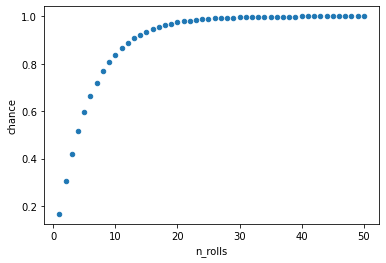

In [27]:
# chance of getting at least one six 
rolls = np.arange(1, 51)
at_least_one = bpd.DataFrame().assign(n_rolls=rolls, chance=1-(5/6)**rolls)
at_least_one.plot(kind='scatter', x='n_rolls', y='chance')

### Simulate the probability for N=20
* What is the chance of getting at least one 6 in 20 rolls?

In [28]:
# SOLUTION
faces = np.arange(1, 7)
outcomes = np.random.choice(faces, 20) # pick random number from faces, 20 times
outcomes

array([6, 4, 3, 2, 2, 6, 1, 6, 6, 5, 6, 6, 4, 6, 3, 1, 2, 5, 2, 1])

In [29]:
# number of positive outcomes
np.count_nonzero(outcomes == 6) # SOLUTION

7

### Run this simulation 100,000 times

In [30]:
# SOLUTION
rolled6 = 0
trials = 100000
for i in np.arange(trials):
    outcomes = np.random.choice(faces, 20)
    if np.count_nonzero(outcomes == 6) >=1:
        rolled6 = rolled6 + 1
        
#estimate the probability
rolled6/trials

0.97337

### Simulate the probability for N=20
* wrap the experiment in a function that takes the number of trials as the input
* run the experiment many times

In [31]:
def roll_20(trials):
    rolled6 = 0
    for i in np.arange(trials):
        outcomes = np.random.choice(faces, 20)
        if np.count_nonzero(outcomes == 6) >=1:
            rolled6 = rolled6 + 1

    return rolled6/trials

roll_20(1000)

0.969

## MBA Player Data

In [32]:
df = bpd.read_csv('data/player_data.csv')
df

,Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
0,James Harden,25,HOU,81,459,565,154,60,321,2217
1,Chris Paul,29,LAC,82,376,838,156,15,190,1564
2,Stephen Curry,26,GSW,80,341,619,163,16,249,1900
3,Anthony Davis,21,NOP,68,696,149,100,200,95,1656
4,DeAndre Jordan,26,LAC,82,1226,61,81,183,109,946
...,...,...,...,...,...,...,...,...,...,...
487,Adreian Payne,23,TOT,32,162,30,19,9,44,213
488,Ricky Ledo,22,TOT,17,36,19,6,1,26,90
489,Gary Harris,20,DEN,55,64,29,39,7,38,188
490,Zach LaVine,19,MIN,77,214,276,54,10,193,778


---

# Top Ten Table Patterns

## And some variations

Let's look at the most common patterns we have been using on tables. They are quite simple when you have a computer. 

However, for the exam, you really need to get familiar with them.

Best way to study: Study by writing code with pen and paper. Learn to check your code for logical and syntax errors, without the help of Python!

# 0) Get and Drop Columns

**Pattern**: `df.get(column_name)`

**Pattern**: `df.drop(columns = column_name)`

Where column_name is a string

### What is the output type of the following line of code?

In [33]:
df.get('Points')

0      2217
1      1564
2      1900
3      1656
4       946
       ... 
487     213
488      90
489     188
490     778
491     501
Name: Points, Length: 492, dtype: int64

**Answer:** Series

In [34]:
df.get('Age')

0      25
1      29
2      26
3      21
4      26
       ..
487    23
488    22
489    20
490    19
491    24
Name: Age, Length: 492, dtype: int64

### What will the variable df_modified contain after running the following line of code?

### Drop column "Age"

In [35]:
df_modified = df.drop("Age")

TypeError: drop() takes 1 positional argument but 2 were given

**Answer:** This is a trick question: the line of code does not execute because you need to specify: columns = "age"

In [ ]:
help(bpd.DataFrame.drop)

In [36]:
df_modified = df.drop(columns = "Age")
df_modified

,Name,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
0,James Harden,HOU,81,459,565,154,60,321,2217
1,Chris Paul,LAC,82,376,838,156,15,190,1564
2,Stephen Curry,GSW,80,341,619,163,16,249,1900
3,Anthony Davis,NOP,68,696,149,100,200,95,1656
4,DeAndre Jordan,LAC,82,1226,61,81,183,109,946
...,...,...,...,...,...,...,...,...,...
487,Adreian Payne,TOT,32,162,30,19,9,44,213
488,Ricky Ledo,TOT,17,36,19,6,1,26,90
489,Gary Harris,DEN,55,64,29,39,7,38,188
490,Zach LaVine,MIN,77,214,276,54,10,193,778


In [37]:
df_modified = df.drop(columns = ["Age", "Team", "Games"])
df_modified

,Name,Rebounds,Assists,Steals,Blocks,Turnovers,Points
0,James Harden,459,565,154,60,321,2217
1,Chris Paul,376,838,156,15,190,1564
2,Stephen Curry,341,619,163,16,249,1900
3,Anthony Davis,696,149,100,200,95,1656
4,DeAndre Jordan,1226,61,81,183,109,946
...,...,...,...,...,...,...,...
487,Adreian Payne,162,30,19,9,44,213
488,Ricky Ledo,36,19,6,1,26,90
489,Gary Harris,64,29,39,7,38,188
490,Zach LaVine,214,276,54,10,193,778


# 1) Get something by its label & index
**Pattern**: `df.get(column_name).loc[row_label].`

### Getting data by its label

In [38]:
df = df.set_index('Name')
df

,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
Name,,,,,,,,,
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900
Anthony Davis,21,NOP,68,696,149,100,200,95,1656
DeAndre Jordan,26,LAC,82,1226,61,81,183,109,946
...,...,...,...,...,...,...,...,...,...
Adreian Payne,23,TOT,32,162,30,19,9,44,213
Ricky Ledo,22,TOT,17,36,19,6,1,26,90
Gary Harris,20,DEN,55,64,29,39,7,38,188


### What does the following line of code return?

In [39]:
df.get('Points').loc['LeBron James']

1743

**Answer:** The number of points for LeBron James

### What does the following line of code return?

In [40]:
df.get('Games').loc['Chris Paul']

82

**Answer:** The number of games for Chris Paul

### Getting Multiple datapoints by their labels

Get the points of players James Harden, Stephen Curry, Adreian Payne

### What is the output type of the last line of code?

In [41]:
query_players = ["James Harden", "Stephen Curry", "Adreian Payne"]
df.get('Points').loc[query_players]

Name
James Harden     2217
Stephen Curry    1900
Adreian Payne     213
Name: Points, dtype: int64

**Answer:** Series object

# 2) Find the label with the largest/smallest value.

**Pattern**: `df.sort_values(by = "Points").iloc[-1]`

**Pattern**: `df.sort_values(by = "Points", ascending = False).iloc[0]`

### What information does the following line of code give us?

In [45]:
df.sort_values(by='Points').iloc[0].get('Points')

0

**Answer:** The number of points for the player with the least points

### According to score, get the point and name of best player

In [48]:
df.sort_values(by='Points').index[-1] # SOLUTION

'James Harden'

## Current state of the dataframe

In [49]:
df

,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
Name,,,,,,,,,
Malcolm Lee,24,PHI,1,0,0,0,0,0,0
Jerrelle Benimon,23,UTA,2,3,0,0,0,1,0
Ronny Turiaf,32,MIN,2,1,2,0,0,0,0
David Wear,24,SAC,2,2,1,0,0,0,0
Kalin Lucas,25,MEM,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
Damian Lillard,24,POR,82,378,507,97,21,222,1720
LeBron James,30,CLE,69,416,511,109,49,272,1743
Russell Westbrook,26,OKC,67,488,574,140,14,293,1886


### What information is output below?

In [50]:
df = df.sort_values(by = "Age", ascending = False)
df.get("Age").iloc[4]

37

In [ ]:
df.index[4]

**Answer:** The age and name of the 5th oldest player

### What is the type of the following output, and what information does it contain?

In [52]:
query_range = np.arange(0, 6)

df.get('Age').sort_values(ascending = True).iloc[query_range]

Name
Aaron Gordon      19
Noah Vonleh       19
Jabari Parker     19
James Young       19
Dante Exum        19
Andrew Wiggins    19
Name: Age, dtype: int64

**Answer:** The name and age of the 6 youngest players

### What is the output below?

In [53]:
df = df.sort_values(by = ["Age", "Points"]) 
df.index[-1]

'Tim Duncan'

**Answer:** The name of the oldest player with the largest number of points

### Get the age and points of this player

In [ ]:
df.get("Age").iloc[-1]

In [ ]:
df.get("Points").iloc[-1]

---

# 3) Compute a statistic for a subset. Filter to get the subset.

**Example**: Players info for players with age >= 30

**Pattern**:

`bool_mask = df.get('Age') >= 30
df[bool_mask]
`

### Return a table containing entries for players with age >= 30

In [ ]:
bool_mask = df.get('Age') >= 30
df[bool_mask]

### What is the output of the last line of code below?

In [ ]:
bool_mask = df.get('Age') >= 30
df[bool_mask].get('Points').mean()

**Answer:** The mean number of points for players that are 30 years or older

### What is the output of the last line of code below?

In [ ]:
mean_points = df.get('Points').mean()
bool_mask = df.get('Points') >= mean_points
df[bool_mask].get('Age').mean()

**Answer:** The mean age of the players, who have scored higher than or equal to the mean points for all players.

# 4) Combining Conditions, Filtering and Getting Statistics

**Pattern**:

`bool1 = df.get('col1') > num1
bool2 = df.get('col2') == num2
bool_condition = bool1 & bool2
df[bool_condition]
`

**Pattern**: Don't forget the parantheses if you write it like below:

`
df[(...) & (...) & (...)]
df[(df.get('col1') > num1) & (df.get('col2') == num2)]
`

### Filter the table, players who have more than 600 assists and more than 100 steals

In [54]:
df[(df.get('Assists') > 600) & (df.get('Steals') > 100)]

,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
Name,,,,,,,,,
John Wall,24,WAS,79,366,792,138,45,304,1387
Stephen Curry,26,GSW,80,341,619,163,16,249,1900
Chris Paul,29,LAC,82,376,838,156,15,190,1564


**Answer:** Filters the table to contain players who have more than 600 assists and more than 100 steals

### What information do we obtain from the following line of code?

In [55]:
df[(df.get('Rebounds') > 1000) & (df.get('Blocks') > 100)].shape[0]

2

**Answer:** The number of  players have more than 300 rebounds and more than 20 blocks

### What information do we obtain from the following lines of code?

In [56]:
mean_points = df.get('Points').mean()
mask1 = df.get('Points') >= mean_points
mask2 = df.get('Games') > 40
bool_mask = mask1 & mask2
df[bool_mask].get('Age').median()

27.0

**Answer:** The median age of players who scored higher than the mean points, and played more than 40 games.

# 5) Compute statistics for a group. 

**Pattern**:

`df.groupby(column_name).func()
`
Where func is the aggrageting function

In [57]:
df = df.reset_index()

In [58]:
df.groupby('Team').min()

,Name,Age,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
Team,,,,,,,,,
ATL,Al Horford,21,24,39,13,10,0,8,96
BOS,Avery Bradley,19,31,42,11,8,2,5,35
BRK,Alan Anderson,21,7,8,1,1,0,1,3
CHI,Aaron Brooks,23,18,8,1,2,1,3,10
CHO,Al Jefferson,19,9,3,4,0,0,3,41
...,...,...,...,...,...,...,...,...,...
SAS,Aron Baynes,21,20,17,10,1,0,2,37
TOR,Amir Johnson,19,6,2,0,0,0,2,6
TOT,A.J. Price,20,5,1,1,0,0,3,6


### AI Horford is the youngest player on ATL? True or False

**Answer:** False, groupby just takes the minimum of each column for each group. Therefore, the minimum here is just the first name alphabetically on Atlanta's team, and the age column contains the age for the youngest player on Atlanta's team.

### What does the following line of code return and what is its output type?

In [59]:
df.groupby('Team').count().get(["Points"])

,Points
Team,
ATL,14
BOS,10
BRK,15
CHI,14
CHO,14
...,...
SAS,15
TOR,15
TOT,76


**Answer:** The total number of points for each team. The output type is a dataframe because the argument ["Points"] was passed in as a list into the "get" function

### What do the values contain in the new column that was created, and what is the name of that column?

In [71]:
new_col = df.get("Points") / df.get("Games")
df_new = (df
    .assign(Points_Per_Game = new_col)
    .sort_values(by = "Points_Per_Game",ascending = False)
)
df_new

,Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Points_Per_Game
269,Russell Westbrook,26,OKC,67,488,574,140,14,293,1886,28.149254
226,James Harden,25,HOU,81,459,565,154,60,321,2217,27.370370
256,Kevin Durant,26,OKC,27,178,110,24,25,74,686,25.407407
403,LeBron James,30,CLE,69,416,511,109,49,272,1743,25.260870
43,Anthony Davis,21,NOP,68,696,149,100,200,95,1656,24.352941
...,...,...,...,...,...,...,...,...,...,...,...
78,Jerrelle Benimon,23,UTA,2,3,0,0,0,1,0,0.000000
186,Kalin Lucas,25,MEM,1,0,0,1,0,0,0,0.000000
137,Malcolm Lee,24,PHI,1,0,0,0,0,0,0,0.000000
136,David Wear,24,SAC,2,2,1,0,0,0,0,0.000000


**Answer:** the average points per game per Game for each player, column name - Points_Per_Game

# 6) Apply function & Conditionals

**Pattern**: `df.get(a_column).apply(a_function)`

### Given a full name, write a function that finds how many words it has

In [73]:
def find_name_len(string):
    """ Finds how many words the name contains """
    return len(string.split())

In [74]:
find_name_len("Frank Lloyd Wright")

3

In [75]:
find_name_len("Tony Montana")

2

### What does the following line of code output?

In [76]:
df.get("Name").apply(find_name_len)

0      2
1      2
2      2
3      2
4      2
      ..
487    2
488    2
489    2
490    2
491    2
Name: Name, Length: 492, dtype: int64

**Answer:** Series object containing the name length (in terms of number of words) for each player

### What information does this code output?

In [77]:
( df
 .reset_index()
 .get("Name")
 .apply(find_name_len)
 .max()
)

4

**Answer:** maximum name length (in terms of number of words)

In [78]:
def assign_age_group(age):
    if age < 21:
        return "young"
    elif age < 31:
        return "mid"
    else:
        return "old"

### What will the line of code below output?

In [79]:
assign_age_group(21)

'mid'

In [80]:
assign_age_group(35)

'old'

### Add a new column to the table, which shows the age group of each player

In [81]:
new_col = df.get("Age").apply(assign_age_group)
df_new = df.assign(Age_Group = new_col)
df_new

,Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Age_Group
0,Bruno Caboclo,19,TOR,8,2,0,0,1,4,10,young
1,Noah Vonleh,19,CHO,25,86,4,4,9,11,83,young
2,James Young,19,BOS,31,42,13,8,2,5,105,young
3,Aaron Gordon,19,ORL,47,169,33,21,22,38,243,young
4,Jabari Parker,19,MIL,25,138,42,31,5,47,308,young
...,...,...,...,...,...,...,...,...,...,...,...
487,Paul Pierce,37,WAS,73,294,144,46,24,92,868,old
488,Kevin Garnett,38,TOT,47,311,77,46,17,46,323,old
489,Andre Miller,38,TOT,81,153,284,32,6,104,355,old
490,Vince Carter,38,MEM,66,133,79,43,14,43,384,old


# 7) Groupby Multiple Columns and look at statistics


**Pattern**:

`df.groupby([column_name1, column_name2]).func()
`
Where func is the aggrageting function

* There should always be an aggregating function. Otherwise we just get a groupby object.

### What does the following line of code output?

In [82]:
df_new.groupby(["Team", "Age_Group"])

**Answer:** a DataFrameGroupBy object because we haven't used any sort of aggregation yet like .max(), .count(), etc.

### What does the following line of code output?

In [83]:
df_groups = (df_new
 .groupby(["Team", "Age_Group"]).count()
 .get(["Team", "Age_Group", "Games"])
)

KeyError: "['Team' 'Age_Group'] not found in columns"

**Answer:** an error because Team and Age_Group are the index, and you cant use .get to get the index

In [84]:
df_groups = (df_new
 .groupby(["Team", "Age_Group"])
 .count()
 .reset_index() # critical change here bc Age_Group was the old index!
 .get(["Team", "Age_Group", "Games"])
)
df_groups

,Team,Age_Group,Games
0,ATL,mid,11
1,ATL,old,3
2,BOS,mid,7
3,BOS,old,1
4,BOS,young,2
...,...,...,...
70,TOT,young,1
71,UTA,mid,14
72,UTA,young,1
73,WAS,mid,10


# 8) Get all rows containing a string.

**Pattern**

`bool_mask = df.get(column_of_strings).str.contains('James')
df[bool_mask]
`

### What does the outputted dataframe contain?

In [ ]:
bool_mask = df.get("Name").str.contains("James")
df[bool_mask]

**Answer:** All players who have the word "James" somewhere in their full name.

### Only players with the substring "Reg" and substring "ie" in their full name remain.

In [ ]:
mask1 = df.get("Name").str.contains("ie")
mask2 = df.get("Name").str.contains("Reg")
df[mask1 & mask2]

# 9) Density Histogram

Here is the scatter plot we created earlier:
<img src="data/scatter_plot_example.png" width="500">

### What will the density histogram look like for the y-axis?

**Answer:** Skewed to left (towards lower probabilities)

### What will the density histogram look like for the x-axis?

**Answer:** uniform, all bars should be the same height because there is one dot on the scatter plot for each number 1-50.

# Top 8 Possible Pitfalls & Things to Keep in Mind

## 0) Difference between & and "and"

Always use "and" with conditionals, always use & with boolean arrays.

Same goes for "or" with conditionals, and | with boolean arrays.

In [ ]:
True and False

In [ ]:
np.array([True, False, True]) & np.array([False, False, False])

In [ ]:
np.array([True, False, True]) and np.array([False, False, False]) # don't do this!

## 1) Parentheses when combining conditionals:

In [ ]:
df[df.get("Age") >= 25 & df.get("Points") >= 2000]

In [ ]:
df[(df.get("Age") >= 25) & (df.get("Points") >= 1800)]

## 2) Column names are meaningless after a `groupby` and count!

In [ ]:
df.groupby("Team").count()

In [ ]:
# Has no relation to the actual "Steals" and "Blocks" columns
df.groupby("Team").count().get(["Steals", "Blocks"])

## 3) Reset index, especially after grouping with multiple columns.

In [ ]:
(df_new
 .groupby(["Team", "Age_Group"])
 .count()
 .reset_index()
)

## 4) `iloc[]` vs `loc[]` vs array indexing`[]`

In [ ]:
# Before using loc, make sure of what type of index you have:
df.index

In [ ]:
df = df.set_index("Name")

In [ ]:
df.get("Age").loc["Stephen Curry"]

In [ ]:
df.get("Age").iloc[2]

In [ ]:
df.index[2]

## 5) Not specifying column while sorting table

Wrong: `df = df.sort_values(ascending = False)` 

Correct: `df = df.sort_values(by = column_name, ascending = False)` 

## 6) Trying to get the index using .get() instead of .index

In [ ]:
# df.get("Name")
df.index

# 7) Using df.drop with missing argument

`df.drop(columns = column_name)` without columns, for example `df.drop(column_name)` is wrong.

In [ ]:
# df.drop("Points")
df.drop(columns = "Points")